# HEALTHCARE: Adults who have obesity (year 2020) compared to physical activity, education, and gender

In [1]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


#Physical Activity

In [2]:
# Name of the CSV file
activity_df = 'Resources/activity_by_state.csv'
activity_df = pd.read_csv(activity_df, encoding="UTF-8")
activity_df.head()


,ID,YearStart,YearEnd,Description,LocationAbbr,LocationDesc,DataSource,Class,Topic,Question,...,StratificationId2,StratificationCategory3,StratificationCategoryId3,Stratification3,StratificationId3,LocationDisplayOrder,FootnoteSymbol,FootnoteText,URL,FootnoteHeading
0,190263.0,2020.0,2020.0,2020.0,US,National,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,190291.0,2020.0,2020.0,2020.0,AL,Alabama,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,190292.0,2020.0,2020.0,2020.0,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
3,190293.0,2020.0,2020.0,2020.0,AZ,Arizona,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
4,190294.0,2020.0,2020.0,2020.0,AR,Arkansas,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN


In [3]:
# Identify the columns
activity_df.columns

Index(['ID', 'YearStart', 'YearEnd', 'Description', 'LocationAbbr',
       'LocationDesc', 'DataSource', 'Class', 'Topic', 'Question', 'Response',
       'Data_Value_Unit', 'DataValueTypeId', 'Data_Value_Type', 'Data_Value',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Low_Confidence_Limit', 'High_Confidence_Limit', 'Sample_Size',
       'GeoLocation_Lat', 'GeoLocation_Long', 'ClassId', 'TopicId',
       'QuestionId', 'ResponseId', 'StratficationCategory1',
       'StratificationCategoryId1', 'Stratification1', 'StratificationId1',
       'StratificationCategory2', 'StratificationCategoryId2',
       'Stratification2', 'StratificationId2', 'StratificationCategory3',
       'StratificationCategoryId3', 'Stratification3', 'StratificationId3',
       'LocationDisplayOrder', 'FootnoteSymbol', 'FootnoteText', 'URL',
       'FootnoteHeading'],
      dtype='object')

In [4]:
# clean the DataFrame to certain columns you need

activity_clean_df = activity_df[["Description", "LocationDesc", "Class", "Question", "Data_Value", ]]
activity_clean_df

,Description,LocationDesc,Class,Question,Data_Value
0,2020.0,National,Physical Activity,Percent of adults who engage in no leisure-tim...,23.5
1,2020.0,Alabama,Physical Activity,Percent of adults who engage in no leisure-tim...,28.8
2,2020.0,Alaska,Physical Activity,Percent of adults who engage in no leisure-tim...,21.3
3,2020.0,Arizona,Physical Activity,Percent of adults who engage in no leisure-tim...,22.4
4,2020.0,Arkansas,Physical Activity,Percent of adults who engage in no leisure-tim...,29.7
...,...,...,...,...,...
58,NaN,NaN,NaN,NaN,NaN
59,NaN,NaN,NaN,NaN,NaN
60,NaN,NaN,NaN,NaN,NaN
61,NaN,NaN,NaN,NaN,NaN


In [5]:
# Drop the data you don't need

activity_clean_df = activity_clean_df.dropna(how='any')
activity_clean_df.head()

,Description,LocationDesc,Class,Question,Data_Value
0,2020.0,National,Physical Activity,Percent of adults who engage in no leisure-tim...,23.5
1,2020.0,Alabama,Physical Activity,Percent of adults who engage in no leisure-tim...,28.8
2,2020.0,Alaska,Physical Activity,Percent of adults who engage in no leisure-tim...,21.3
3,2020.0,Arizona,Physical Activity,Percent of adults who engage in no leisure-tim...,22.4
4,2020.0,Arkansas,Physical Activity,Percent of adults who engage in no leisure-tim...,29.7


In [6]:
# Rename the Column names
# Question: Percent of adults who are Physical Active

activity_clean_df = activity_clean_df.rename(columns={"Description": "Year", 
                                    "LocationDesc": "Location", "Data_Value" : "Active Average (%)",})
activity_clean_df.head()


,Year,Location,Class,Question,Active Average (%)
0,2020.0,National,Physical Activity,Percent of adults who engage in no leisure-tim...,23.5
1,2020.0,Alabama,Physical Activity,Percent of adults who engage in no leisure-tim...,28.8
2,2020.0,Alaska,Physical Activity,Percent of adults who engage in no leisure-tim...,21.3
3,2020.0,Arizona,Physical Activity,Percent of adults who engage in no leisure-tim...,22.4
4,2020.0,Arkansas,Physical Activity,Percent of adults who engage in no leisure-tim...,29.7


In [7]:
# Delete the unnecessary row "national"

activity_final_df=activity_clean_df.drop(activity_clean_df.index[[0]])
activity_final_df.head()

,Year,Location,Class,Question,Active Average (%)
1,2020.0,Alabama,Physical Activity,Percent of adults who engage in no leisure-tim...,28.8
2,2020.0,Alaska,Physical Activity,Percent of adults who engage in no leisure-tim...,21.3
3,2020.0,Arizona,Physical Activity,Percent of adults who engage in no leisure-tim...,22.4
4,2020.0,Arkansas,Physical Activity,Percent of adults who engage in no leisure-tim...,29.7
5,2020.0,California,Physical Activity,Percent of adults who engage in no leisure-tim...,21.2


In [8]:
# sort obesity for Lowest to hightest
# The best location

best = activity_final_df.sort_values("Active Average (%)", ascending =False)
best.head()

,Year,Location,Class,Question,Active Average (%)
53,2020.0,Puerto Rico,Physical Activity,Percent of adults who engage in no leisure-tim...,45.8
18,2020.0,Kentucky,Physical Activity,Percent of adults who engage in no leisure-tim...,30.6
25,2020.0,Mississippi,Physical Activity,Percent of adults who engage in no leisure-tim...,30.0
49,2020.0,West Virginia,Physical Activity,Percent of adults who engage in no leisure-tim...,29.7
4,2020.0,Arkansas,Physical Activity,Percent of adults who engage in no leisure-tim...,29.7


In [9]:
# sort obesity for Lowest to hightest
# The worst location

worst = activity_final_df.sort_values("Active Average (%)")
worst.head()

,Year,Location,Class,Question,Active Average (%)
45,2020.0,Utah,Physical Activity,Percent of adults who engage in no leisure-tim...,15.9
6,2020.0,Colorado,Physical Activity,Percent of adults who engage in no leisure-tim...,16.6
48,2020.0,Washington,Physical Activity,Percent of adults who engage in no leisure-tim...,17.8
9,2020.0,District of Columbia,Physical Activity,Percent of adults who engage in no leisure-tim...,18.1
46,2020.0,Vermont,Physical Activity,Percent of adults who engage in no leisure-tim...,18.2


In [10]:
activity_final_df.head()

,Year,Location,Class,Question,Active Average (%)
1,2020.0,Alabama,Physical Activity,Percent of adults who engage in no leisure-tim...,28.8
2,2020.0,Alaska,Physical Activity,Percent of adults who engage in no leisure-tim...,21.3
3,2020.0,Arizona,Physical Activity,Percent of adults who engage in no leisure-tim...,22.4
4,2020.0,Arkansas,Physical Activity,Percent of adults who engage in no leisure-tim...,29.7
5,2020.0,California,Physical Activity,Percent of adults who engage in no leisure-tim...,21.2


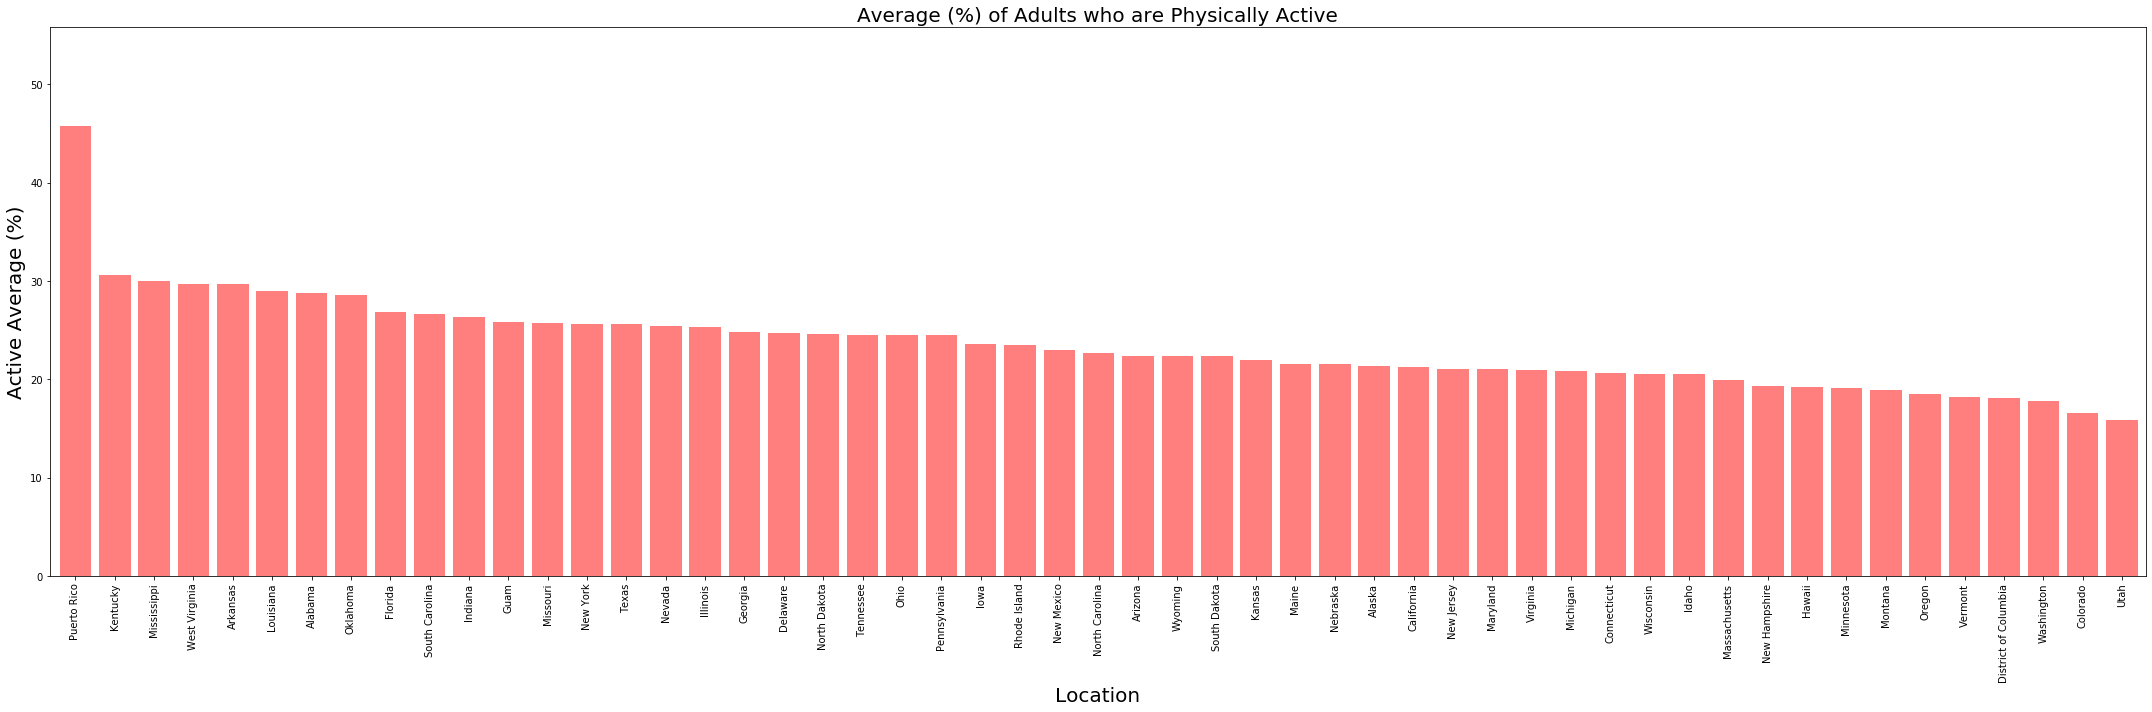

In [11]:
# Create a bar chart for the Average % of Adults who are Physically Active in each location

# Set x axis and tick locations
x_axis = np.arange(len(activity_final_df))
tick_locations = [value+0.4 for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(30,10))

activity_final_df= activity_final_df.sort_values('Active Average (%)', ascending=False)

plt.bar(x_axis, activity_final_df["Active Average (%)"], color='r', alpha=0.5, align="edge", data=activity_final_df)
plt.xticks(tick_locations, activity_final_df["Location"], rotation="vertical")

# Set x and y limits
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(activity_final_df["Active Average (%)"])+10)

# Set a Title and labels
fontsize = 20
plt.title("Average (%) of Adults who are Physically Active", fontsize=fontsize)
plt.xlabel("Location", fontsize=fontsize)
plt.ylabel("Active Average (%)", fontsize=fontsize)

# Show the graph
plt.tight_layout()
plt.savefig("Resources/activity_bar_chart.png")
plt.show()


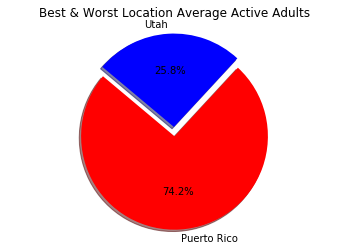

In [12]:
# Create a pie chart for the location with the Highest and Lowest average of physically active adults

location = ["Puerto Rico", "Utah"]
average = [45.8, 15.9]
colors = ["red", "blue"]
explode = (0, 0.1)

plt.title("Best & Worst Location Average Active Adults")

plt.pie(average, explode=explode, labels=location, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.savefig("Resources/activity_pie_chart.png")
plt.show()


#EDUCATION

In [13]:
#path to csv
file = "Resources/education_obesity.csv"
#read csv
education = pd.read_csv(file, encoding="ISO-8859-1")
education.head()

,ï»¿ID,YearStart,YearEnd,Description,LocationAbbr,LocationDesc,DataSource,Class,Topic,Question,...,StratificationId2,StratificationCategory3,StratificationCategoryId3,Stratification3,StratificationId3,LocationDisplayOrder,FootnoteSymbol,FootnoteText,URL,FootnoteHeading
0,193290.0,2020.0,2020.0,2020.0,US,National,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,193291.0,2020.0,2020.0,2020.0,US,National,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,193292.0,2020.0,2020.0,2020.0,US,National,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,193293.0,2020.0,2020.0,2020.0,US,National,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,193370.0,2020.0,2020.0,2020.0,AL,Alabama,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [14]:
#only obtain relevant columns
clean_education= education[["Description", "LocationDesc", "Class", "Data_Value", "Stratification1"]]
clean_education.tail()

,Description,LocationDesc,Class,Data_Value,Stratification1
220,NaN,NaN,NaN,NaN,NaN
221,NaN,NaN,NaN,NaN,NaN
222,NaN,NaN,NaN,NaN,NaN
223,NaN,NaN,NaN,NaN,NaN
224,NaN,NaN,NaN,NaN,NaN


In [15]:
#drop NaNs
clean_education = clean_education.dropna(how='any')
clean_education.head()

,Description,LocationDesc,Class,Data_Value,Stratification1
0,2020.0,National,Obesity / Weight Status,38.8,Less than high school
1,2020.0,National,Obesity / Weight Status,34.0,High school graduate
2,2020.0,National,Obesity / Weight Status,34.1,Some college or technical school
3,2020.0,National,Obesity / Weight Status,25.0,College graduate
4,2020.0,Alabama,Obesity / Weight Status,40.4,Less than high school


In [16]:
#rename columns
clean_education = clean_education.rename(columns={"Description": "Year", 
                                                  "LocationDesc": "Location", 
                                                  "Data_Value": "Obese Average (%)", 
                                                  "Stratification1": "Education Level"})
clean_education.head()

,Year,Location,Class,Obese Average (%),Education Level
0,2020.0,National,Obesity / Weight Status,38.8,Less than high school
1,2020.0,National,Obesity / Weight Status,34.0,High school graduate
2,2020.0,National,Obesity / Weight Status,34.1,Some college or technical school
3,2020.0,National,Obesity / Weight Status,25.0,College graduate
4,2020.0,Alabama,Obesity / Weight Status,40.4,Less than high school


In [17]:
#remove "national" row
state_education = clean_education.drop(clean_education.index[[0,1,2,3]])
state_education.head()

,Year,Location,Class,Obese Average (%),Education Level
4,2020.0,Alabama,Obesity / Weight Status,40.4,Less than high school
5,2020.0,Alabama,Obesity / Weight Status,39.6,High school graduate
6,2020.0,Alabama,Obesity / Weight Status,40.1,Some college or technical school
7,2020.0,Alabama,Obesity / Weight Status,36.1,College graduate
8,2020.0,Alaska,Obesity / Weight Status,29.6,Less than high school


In [18]:
#sort obesity from lowest to highest
best = state_education.sort_values("Obese Average (%)")
best.head()

,Year,Location,Class,Obese Average (%),Education Level
39,2020.0,District of Columbia,Obesity / Weight Status,16.4,College graduate
27,2020.0,Colorado,Obesity / Weight Status,18.2,College graduate
51,2020.0,Hawaii,Obesity / Weight Status,18.8,College graduate
187,2020.0,Vermont,Obesity / Weight Status,19.1,College graduate
23,2020.0,California,Obesity / Weight Status,19.6,College graduate


In [19]:
#sort obesity from highest to lowest in less than high school
worst_less_HS = state_education.loc[state_education["Education Level"] == "Less than high school"]
worst_1 = worst_less_HS.sort_values("Obese Average (%)", ascending=False)
worst_1 = worst_1.set_index("Location")
worst_1.head()

,Year,Class,Obese Average (%),Education Level
Location,,,,
Texas,2020.0,Obesity / Weight Status,44.5,Less than high school
California,2020.0,Obesity / Weight Status,44.5,Less than high school
Illinois,2020.0,Obesity / Weight Status,44.1,Less than high school
South Dakota,2020.0,Obesity / Weight Status,42.1,Less than high school
Delaware,2020.0,Obesity / Weight Status,41.3,Less than high school


In [20]:
worst_HS = state_education.loc[state_education["Education Level"] == "High school graduate"]
worst_2 = worst_HS.sort_values("Obese Average (%)", ascending=False)
worst_2 = worst_2.set_index("Location")
worst_2.head()

,Year,Class,Obese Average (%),Education Level
Location,,,,
Mississippi,2020.0,Obesity / Weight Status,41.4,High school graduate
West Virginia,2020.0,Obesity / Weight Status,40.7,High school graduate
Alabama,2020.0,Obesity / Weight Status,39.6,High school graduate
Guam,2020.0,Obesity / Weight Status,39.3,High school graduate
Oklahoma,2020.0,Obesity / Weight Status,39.0,High school graduate


In [21]:
worst_technical = state_education.loc[state_education["Education Level"] == "Some college or technical school"]
worst_3 = worst_technical.sort_values("Obese Average (%)", ascending=False)
worst_3 = worst_3.set_index("Location")
worst_3.head()

,Year,Class,Obese Average (%),Education Level
Location,,,,
Louisiana,2020.0,Obesity / Weight Status,42.8,Some college or technical school
Mississippi,2020.0,Obesity / Weight Status,42.2,Some college or technical school
West Virginia,2020.0,Obesity / Weight Status,40.8,Some college or technical school
Arkansas,2020.0,Obesity / Weight Status,40.3,Some college or technical school
Alabama,2020.0,Obesity / Weight Status,40.1,Some college or technical school


In [22]:
worst_college = state_education.loc[state_education["Education Level"] == "College graduate"]
worst_4 = worst_college.sort_values("Obese Average (%)", ascending=False)
worst_4 = worst_4.set_index("Location")
worst_4.head()

,Year,Class,Obese Average (%),Education Level
Location,,,,
Alabama,2020.0,Obesity / Weight Status,36.1,College graduate
West Virginia,2020.0,Obesity / Weight Status,34.9,College graduate
Kentucky,2020.0,Obesity / Weight Status,34.4,College graduate
Indiana,2020.0,Obesity / Weight Status,33.8,College graduate
Ohio,2020.0,Obesity / Weight Status,33.4,College graduate


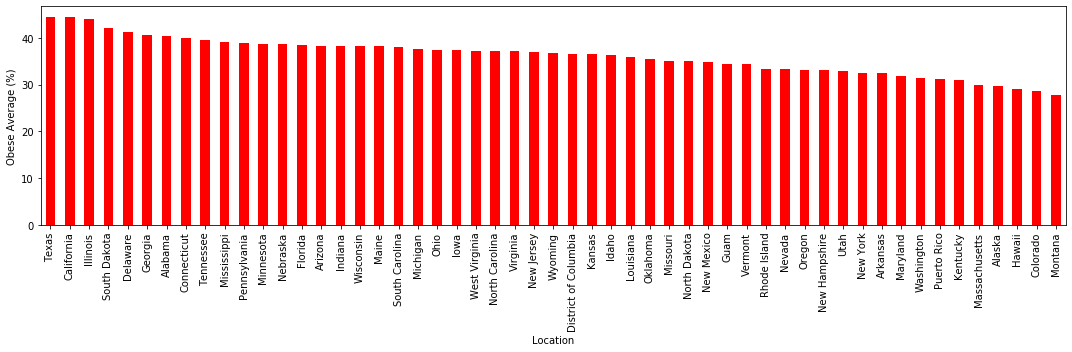

In [23]:
#less than highschool 
worst_1["Obese Average (%)"].plot(kind ="bar", color="red", figsize=(15,5))
plt.xlabel("Location")
plt.ylabel("Obese Average (%)")
plt.tight_layout()
plt.savefig("Resources/less_HS.png")
plt.show()

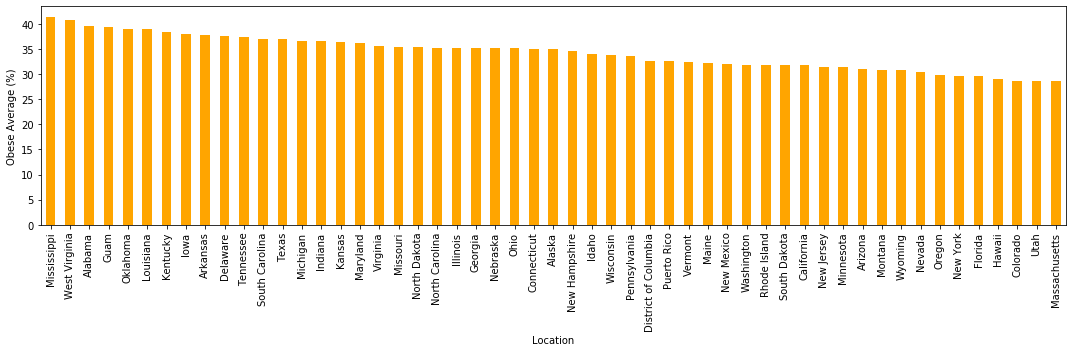

In [24]:
#High school
worst_2["Obese Average (%)"].plot(kind ="bar", color="orange", figsize=(15,5))
plt.xlabel("Location")
plt.ylabel("Obese Average (%)")
plt.savefig("Resources/HS.png")
plt.tight_layout()
plt.show()

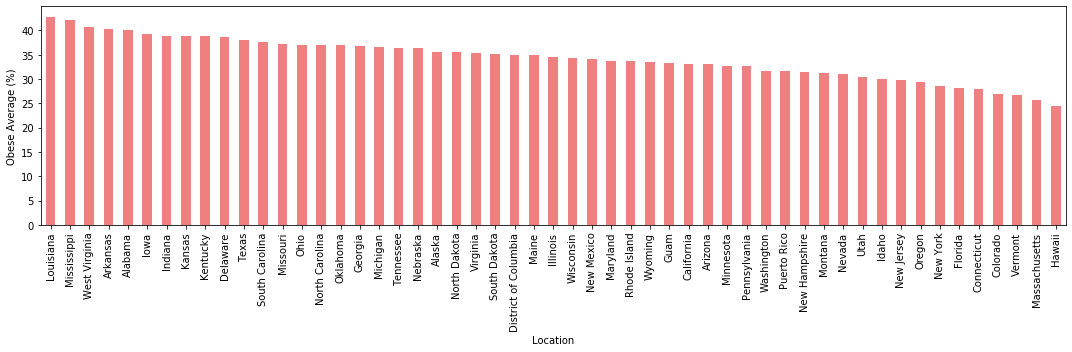

In [25]:
#Some college or technical school
worst_3["Obese Average (%)"].plot(kind ="bar", color="lightcoral", figsize=(15,5))
plt.xlabel("Location")
plt.ylabel("Obese Average (%)")
plt.tight_layout()
plt.savefig("Resources/technical.png")
plt.show()

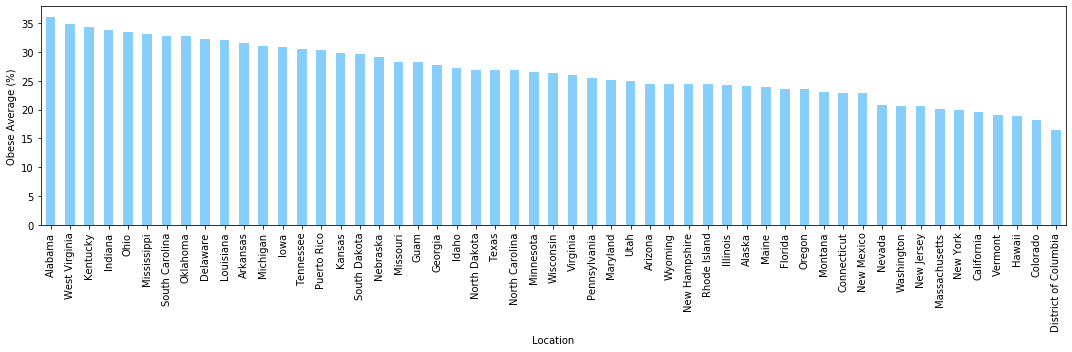

In [26]:
#college
worst_4["Obese Average (%)"].plot(kind ="bar", color="lightskyblue", figsize=(15,5))
plt.xlabel("Location")
plt.ylabel("Obese Average (%)")
plt.tight_layout()
plt.savefig("Resources/college.png")
plt.show()

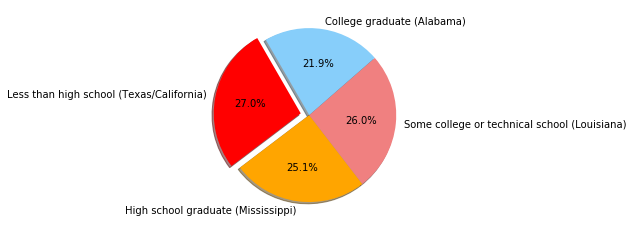

In [27]:
#labels for the sections of our pie chart
labels = ["Less than high school (Texas/California)", "High school graduate (Mississippi)", "Some college or technical school (Louisiana)", "College graduate (Alabama)"]

#the values of each section of the pie chart
sizes = [44.5, 41.4, 42.8, 36.1]

#the colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue"]

#separate the "less than high school" section from the others
explode = (0.1, 0, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)

plt.savefig("Resources/ed_pie.png")

#GENDER

In [28]:
# Import file and read csv
file = "Resources/gender_obesity.csv"

o_df = pd.read_csv(file)
o_df.head()


,ID,YearStart,YearEnd,Description,LocationAbbr,LocationDesc,DataSource,Class,Topic,Question,...,StratificationId2,StratificationCategory3,StratificationCategoryId3,Stratification3,StratificationId3,LocationDisplayOrder,FootnoteSymbol,FootnoteText,URL,FootnoteHeading
0,193288.0,2020.0,2020.0,2020.0,US,National,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,193289.0,2020.0,2020.0,2020.0,US,National,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,193368.0,2020.0,2020.0,2020.0,AL,Alabama,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,193369.0,2020.0,2020.0,2020.0,AL,Alabama,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,193395.0,2020.0,2020.0,2020.0,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN


In [29]:
# List columns
o_df.columns

Index(['ID', 'YearStart', 'YearEnd', 'Description', 'LocationAbbr',
       'LocationDesc', 'DataSource', 'Class', 'Topic', 'Question', 'Response',
       'Data_Value_Unit', 'DataValueTypeId', 'Data_Value_Type', 'Data_Value',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Low_Confidence_Limit', 'High_Confidence_Limit', 'Sample_Size',
       'GeoLocation_Lat', 'GeoLocation_Long', 'ClassId', 'TopicId',
       'QuestionId', 'ResponseId', 'StratficationCategory1',
       'StratificationCategoryId1', 'Stratification1', 'StratificationId1',
       'StratificationCategory2', 'StratificationCategoryId2',
       'Stratification2', 'StratificationId2', 'StratificationCategory3',
       'StratificationCategoryId3', 'Stratification3', 'StratificationId3',
       'LocationDisplayOrder', 'FootnoteSymbol', 'FootnoteText', 'URL',
       'FootnoteHeading'],
      dtype='object')

In [30]:
# Delete extraneous columns
o_clean_df = o_df[['Description','LocationDesc','Class', 'Question','Data_Value','Stratification1']]
o_clean_df.head()

,Description,LocationDesc,Class,Question,Data_Value,Stratification1
0,2020.0,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.7,Male
1,2020.0,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.1,Female
2,2020.0,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,37.7,Male
3,2020.0,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,40.3,Female
4,2020.0,Alaska,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.8,Male


In [31]:
# Identify empty rows
o_clean_df.count()

Description        108
LocationDesc       108
Class              108
Question           108
Data_Value         108
Stratification1    108
dtype: int64

In [32]:
# Remove empty rows
o_clean_df = o_clean_df.dropna(how='any')

o_clean_df

,Description,LocationDesc,Class,Question,Data_Value,Stratification1
0,2020.0,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.7,Male
1,2020.0,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.1,Female
2,2020.0,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,37.7,Male
3,2020.0,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,40.3,Female
4,2020.0,Alaska,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.8,Male
...,...,...,...,...,...,...
103,2020.0,Wyoming,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.4,Female
104,2020.0,Guam,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.8,Male
105,2020.0,Guam,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,35.1,Female
106,2020.0,Puerto Rico,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,28.4,Male


In [33]:
# Rename columns
o_clean_df = o_clean_df.rename(columns={"Description":"Year","LocationDesc":"Location","Data_Value":"Obese Average (%)","Stratification1":"Gender"})
o_clean_df.head()
            

,Year,Location,Class,Question,Obese Average (%),Gender
0,2020.0,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.7,Male
1,2020.0,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.1,Female
2,2020.0,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,37.7,Male
3,2020.0,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,40.3,Female
4,2020.0,Alaska,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.8,Male


In [34]:
# Remove national rows
o_final_df = o_clean_df.drop(o_clean_df.index[[0,1]])
o_final_df.head()

,Year,Location,Class,Question,Obese Average (%),Gender
2,2020.0,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,37.7,Male
3,2020.0,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,40.3,Female
4,2020.0,Alaska,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.8,Male
5,2020.0,Alaska,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,29.6,Female
6,2020.0,Arizona,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,30.8,Male


In [35]:
# Organize dataframe by obese average
highest = o_final_df.sort_values("Obese Average (%)", ascending=False)
highest.head()

,Year,Location,Class,Question,Obese Average (%),Gender
51,2020.0,Mississippi,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,42.8,Female
98,2020.0,West Virginia,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,40.6,Male
3,2020.0,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,40.3,Female
39,2020.0,Louisiana,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,39.8,Female
83,2020.0,South Carolina,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,39.4,Female


In [36]:
# Organize by lowest obese average
lowest = o_final_df.sort_values("Obese Average (%)")
lowest.head()

,Year,Location,Class,Question,Obese Average (%),Gender
18,2020.0,District of Columbia,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,19.1,Male
25,2020.0,Hawaii,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,22.3,Female
45,2020.0,Massachusetts,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,23.4,Female
13,2020.0,Colorado,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,24.1,Female
12,2020.0,Colorado,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,24.3,Male


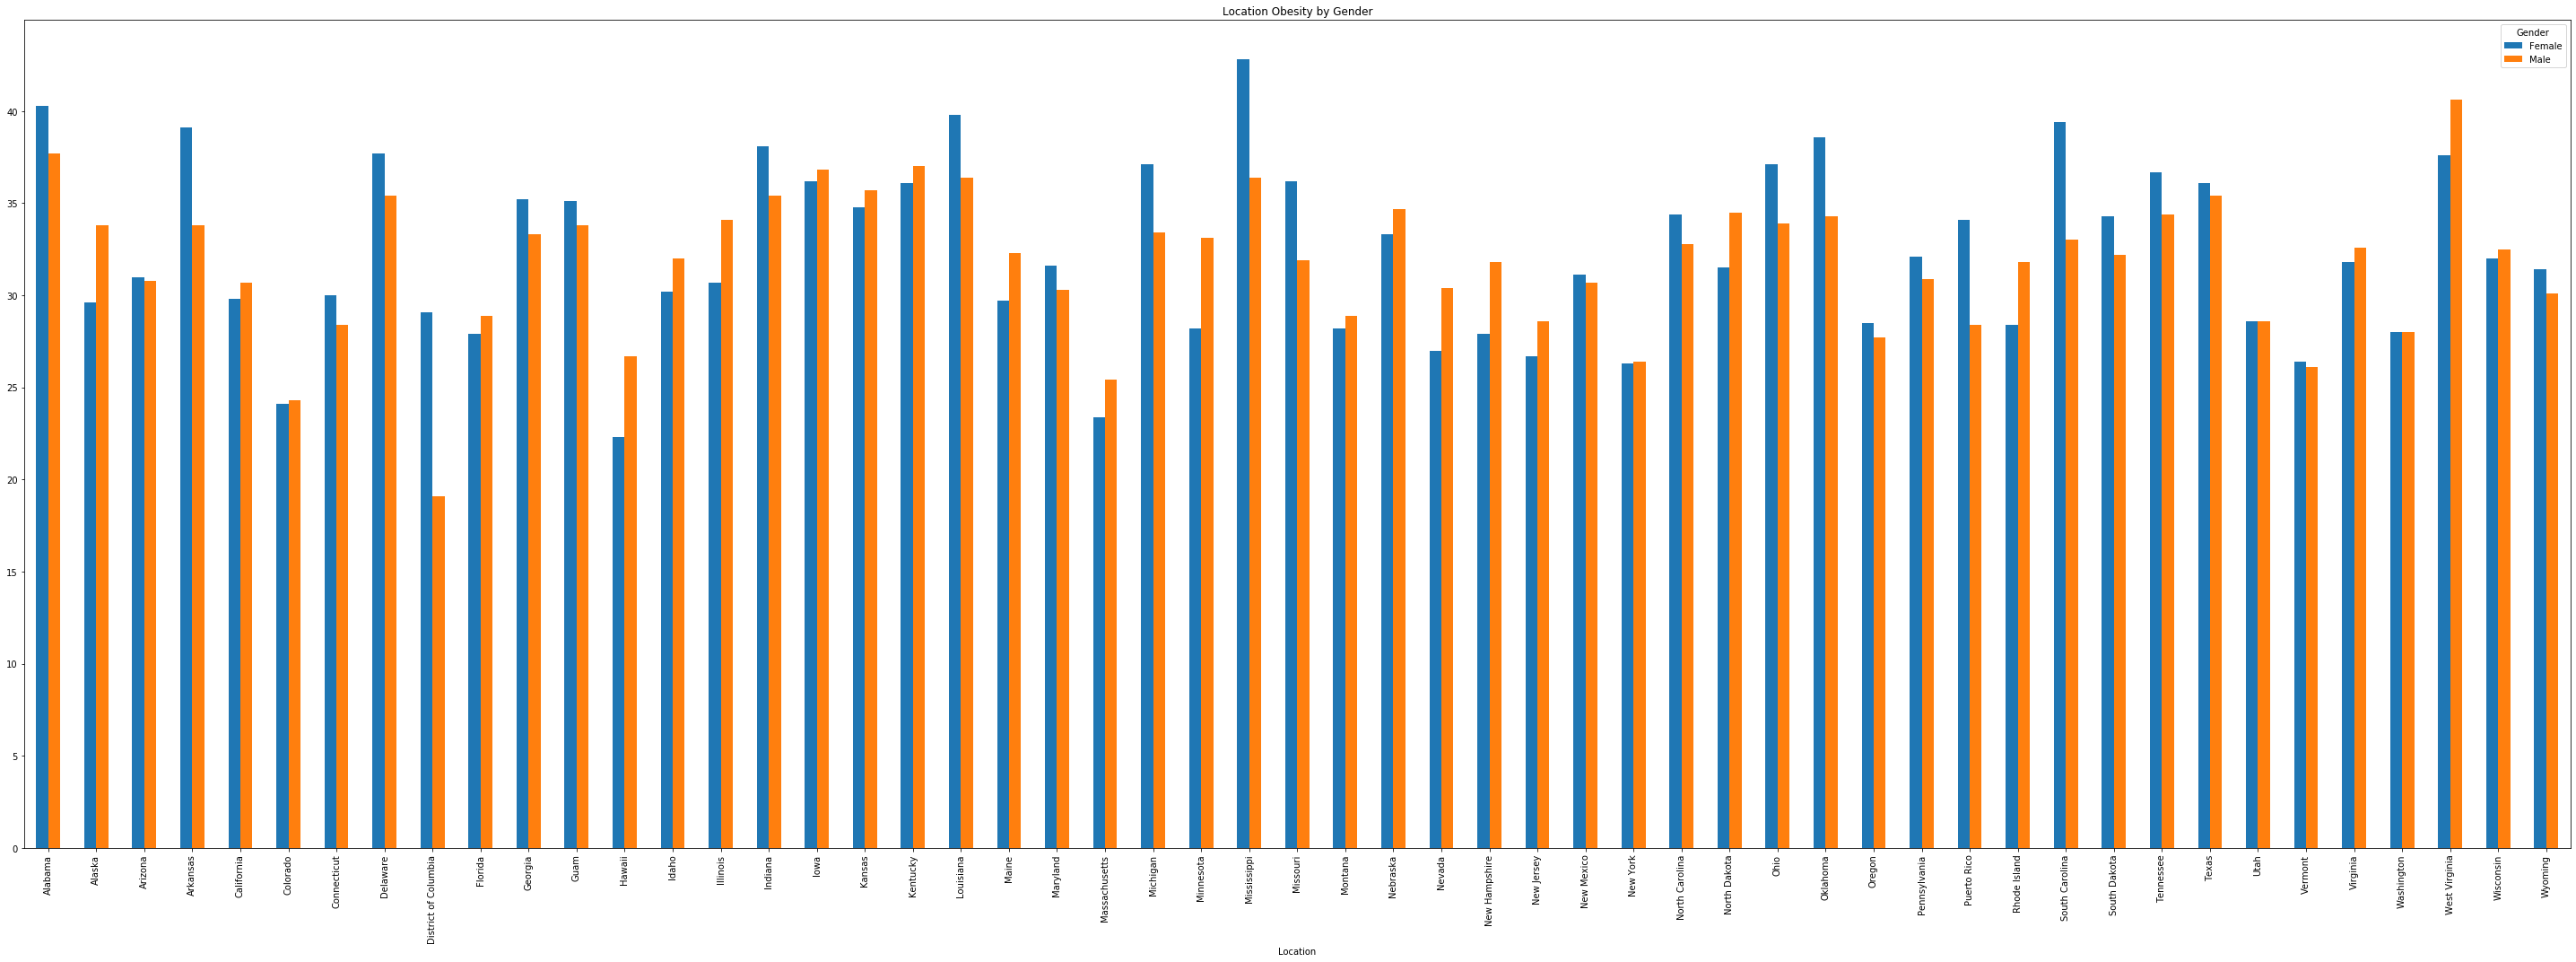

In [37]:
# Create bar chart showing obesity % for each location by gender
# Filter dataframe down to state, obesity, and gender
o_final_df.pivot(index='Location', columns='Gender', values='Obese Average (%)').plot(kind='bar', figsize=(40,15))
plt.title('Location Obesity by Gender')
plt.tight_layout()
# Save 
plt.savefig("Resources/loc_gender_obesity.png")
plt.show()

In [38]:
# Create table for stacked bar chart
pivot = pd.pivot_table(data=o_final_df, index=['Location'], columns=['Gender'], values='Obese Average (%)')
pivot.head()

Gender,Female,Male
Location,,
Alabama,40.3,37.7
Alaska,29.6,33.8
Arizona,31.0,30.8
Arkansas,39.1,33.8
California,29.8,30.7


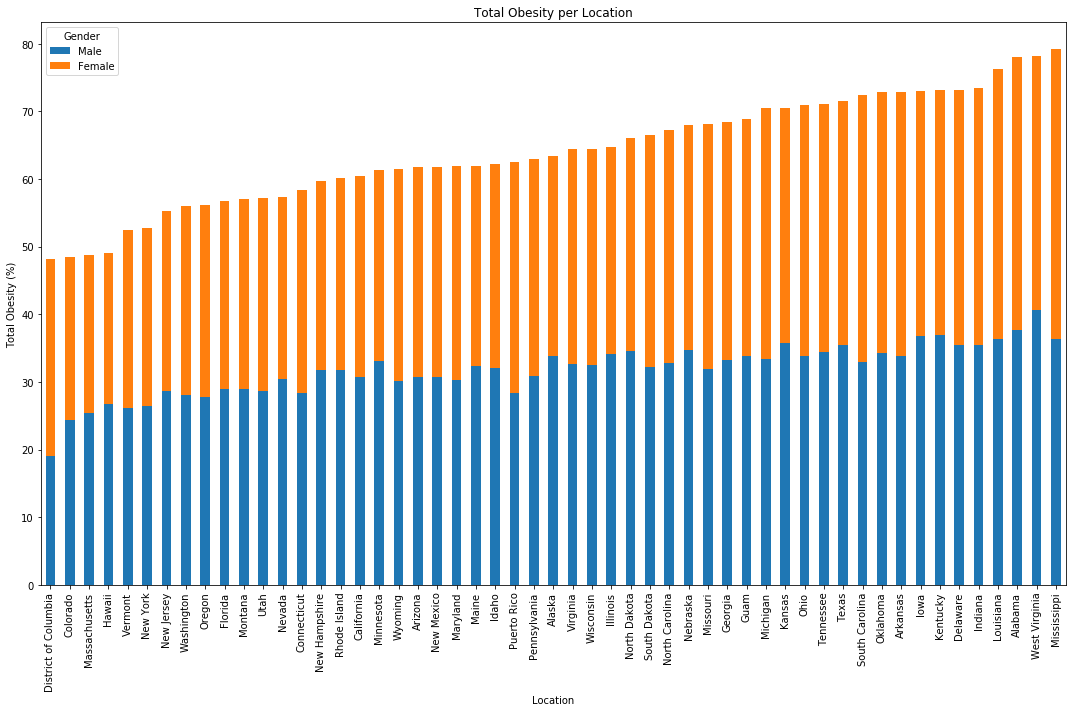

In [39]:
# Create a stacked bar chart showing the location with the lowest levels of obesity.
pivot['total'] = pivot.sum(axis=1)

pivot.sort_values('total', inplace=True)
chart = pivot[['Male','Female']].plot(kind='bar', stacked=True, color=['tab:blue', 'tab:orange'], figsize=[15,10])
plt.ylabel('Total Obesity (%)')
plt.title('Total Obesity per Location')
plt.tight_layout()


plt.savefig("Resources/loc_healthiest_obesity.png")
plt.show()